In [1]:
### PROJECT 1. SHARK ATTACKS!!!

#Import the necessary libraries

import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS # We will explain now the StopWord importation
from PIL import Image  # pip install pillow

C:\Users\Aida\AppData\Local\Temp\ipykernel_2448\3419400629.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
open("datasets/attacks.csv")

<_io.TextIOWrapper name='datasets/attacks.csv' mode='r' encoding='utf-8'>

In [3]:
attack = pd.read_csv('datasets/attacks.csv', encoding="cp1252")

In [4]:
attack_clean=attack.copy()
attack_clean.shape

(25723, 24)

In [5]:
#check for missing data

mv= pd.isnull(attack_clean)
mc = mv.sum() 
mc #we have LOTS of missing data!! almost 70% of data in each variable is missing!

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
#remove the rows that are completely missing, if any

attack_clean=attack_clean.dropna(how='all', axis=0) #axis=0 es filas
attack_clean.shape

(8703, 24)

In [7]:
#remove the columns that are completely missing, if any
#attack_clean=attack_clean.dropna(how='all', axis=1) NOT WORKING

attack_clean.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace=True)

In [8]:
attack_clean.shape #we keep 8703 rowns and 22 columns with some data

(8703, 22)

In [9]:
dupl_rows = attack_clean.duplicated()
dupl_rows.sum() #we have duplicated 2392 rows here!


2392

In [10]:
def cleaning(df, threshold=0.1):
    columnas=round(len(df.columns)*threshold)
    print(columnas)
    
cleaning(attack_clean, threshold=0.20) #mínimo tiene que haber un 10% de columnas no missing para dropear. En este caso, son 2 columnas

4


In [11]:
attack_clean=attack_clean.dropna(thresh=len(attack_clean.columns)*0.8) #remove rows with over 20% missing data

In [12]:
attack_clean.shape #we keep 5874 rows and 22 columns with some data after removing duplicates

(5874, 22)

In [13]:
attack_clean.rename(columns={"Species ": "Species"}, inplace=True) #rename the variable to avoid the last blank space
attack_clean.rename(columns={"Sex ": "Sex"}, inplace=True) #rename the variable to avoid the last blank space
attack_clean.rename(columns={"Fatal (Y/N)": "Fatal"}, inplace=True) #rename it with just one word

In [14]:
attack_clean['Age'] = pd.to_numeric(attack_clean['Age'], errors='coerce') #now we can get the age as numeric. Errors will result in missing
attack_clean.Age.describe()
attack_clean.Age.isna().sum() #we have 971 missing values in the variable #we have too many missing, so we are going to drop them, when we use this variable in subsets

2521

In [15]:
attack_clean.Age.unique()

array([57., 11., 48., nan, 18., 52., 15., 12., 32., 10., 21., 34., 30.,
       60., 33., 29., 54., 41., 37., 56., 19., 25., 69., 38., 55., 35.,
       46., 45., 14., 28., 20., 24., 26., 49., 22.,  7., 31., 17., 40.,
       13., 42.,  3.,  8., 50., 16., 82., 73., 68., 51., 39., 58., 47.,
       61., 65., 36., 66., 43.,  9., 72., 59.,  6., 27., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1., 81., 78.])

In [16]:
attack_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5873 non-null   object 
 1   Date                    5874 non-null   object 
 2   Year                    5872 non-null   float64
 3   Type                    5873 non-null   object 
 4   Country                 5864 non-null   object 
 5   Area                    5634 non-null   object 
 6   Location                5560 non-null   object 
 7   Activity                5525 non-null   object 
 8   Name                    5812 non-null   object 
 9   Sex                     5537 non-null   object 
 10  Age                     3353 non-null   float64
 11  Injury                  5866 non-null   object 
 12  Fatal                   5431 non-null   object 
 13  Time                    2932 non-null   object 
 14  Species                 3352 non-null   objec

In [17]:
#let's pass the float age to integer age, as it makes no sense to have it with decimals
#attack_clean['Year'] = attack_clean['Year'].astype(int)

In [18]:
attack_clean.Year.unique()
attack_clean = attack_clean.dropna(subset=['Year']) #drop the missing values of the variable Year

In [19]:
attack_clean.shape

(5872, 22)

In [20]:
#clean the variable sex

attack_clean.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [21]:
attack_clean = attack_clean.drop(attack_clean[attack_clean['Sex'] == 'lli'].index)

In [22]:
attack_clean['Sex'] = attack_clean['Sex'].replace({'.': np.nan})

In [23]:
attack_clean.Sex.isna().sum()

338

In [24]:
attack_clean = attack_clean.dropna(subset=['Sex']) #drop the missing values of the variable sex

In [25]:
attack_clean['Sex'] = attack_clean['Sex'].str.replace('M ', 'M')
attack_clean['Sex'] = attack_clean['Sex'].str.replace('N', 'M')
attack_clean = attack_clean.drop(attack_clean[attack_clean['Sex'] == 'lli'].index)

In [26]:
#cleaning the countries, setting the names to title style. 
attack_clean["Country"]= attack_clean["Country"].str.title()
attack_clean['Country'] = attack_clean['Country'].str.replace('Usa', 'USA')

In [27]:
attack_clean.sample() 
attack_clean.reset_index(drop=True)
attack_clean.info()#it looks good now! we can do more later, but now we have a fairly clean database to start subsetting

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5532 non-null   object 
 1   Date                    5533 non-null   object 
 2   Year                    5533 non-null   float64
 3   Type                    5532 non-null   object 
 4   Country                 5523 non-null   object 
 5   Area                    5300 non-null   object 
 6   Location                5226 non-null   object 
 7   Activity                5215 non-null   object 
 8   Name                    5492 non-null   object 
 9   Sex                     5533 non-null   object 
 10  Age                     3324 non-null   float64
 11  Injury                  5526 non-null   object 
 12  Fatal                   5112 non-null   object 
 13  Time                    2836 non-null   object 
 14  Species                 3106 non-null   objec

In [28]:
attack_clean.to_excel("datasets/sa_attack_clean.xlsx")

##LET'S START WITH THE HIPOTHESIS!

Hipothesis 1: ¿Cómo se distribuyen los tiburones? ¿Son viajeros? Preferencias de país? Oceanía todos los criminales de UK…

In [29]:
#hipothesis 1: 
hip1=attack_clean.copy()


In [30]:
hip1=hip1.loc[:, ['Year', 'Name','Age','Sex','Country', 'Species','Fatal']]
hip1["n_attacks"]=1 #we create a variable that counts the number of attacks per case (row),so always 1
hip1.info()
hip1.dropna (inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 0 to 6301
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       5533 non-null   float64
 1   Name       5492 non-null   object 
 2   Age        3324 non-null   float64
 3   Sex        5533 non-null   object 
 4   Country    5523 non-null   object 
 5   Species    3106 non-null   object 
 6   Fatal      5112 non-null   object 
 7   n_attacks  5533 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 389.0+ KB


In [31]:
#let's clean the variable age!
hip1 = hip1.dropna(subset=['Age']) #drop the missing values of the variable Age
hip1 = hip1.dropna(subset=['Country']) #drop the missing values of the variable Country

In [32]:
hip1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1916 entries, 0 to 6276
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1916 non-null   float64
 1   Name       1916 non-null   object 
 2   Age        1916 non-null   float64
 3   Sex        1916 non-null   object 
 4   Country    1916 non-null   object 
 5   Species    1916 non-null   object 
 6   Fatal      1916 non-null   object 
 7   n_attacks  1916 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 134.7+ KB


In [33]:
hip1.Country.nunique() #there are too many names, so we have to create categories (continents?)


90

In [34]:
from sources.funciones import continente


In [35]:
hip1['Continente'] = hip1['Country'].apply(lambda x: continente(x))

In [36]:
hip1.Country.unique()

array(['USA', 'Brazil', 'Australia', 'England', 'Costa Rica', 'Maldives',
       'South Africa', 'Thailand', 'Bahamas', 'Ecuador', 'Malaysia',
       'Cuba', 'Spain', 'Egypt', 'Mexico', 'Reunion', 'United Kingdom',
       'Philippines', 'Indonesia', 'Columbia', 'New Zealand',
       'French Polynesia', 'New Caledonia', 'St. Martin', 'France',
       'Jamaica', 'Tonga', 'Scotland', 'Italy', 'Taiwan',
       'Papua New Guinea', 'Russia', 'Seychelles', 'Turks & Caicos',
       'Malta', 'Vietnam', 'Mozambique', 'Guam', 'Croatia', 'Norway',
       'Fiji', 'St. Maartin', 'Grand Cayman', 'China', 'Vanuatu',
       'South Korea', 'Japan', 'Uruguay', 'Venezuela', 'India', 'Canada',
       'Okinawa', 'Tanzania', ' Tonga', 'Marshall Islands', 'Mauritius',
       'Senegal', 'Hong Kong', 'Chile', 'Kenya', 'North Atlantic Ocean',
       'Portugal', 'South China Sea', 'Bermuda', 'Israel',
       'Western Samoa', 'British Isles', 'Micronesia', 'Palau',
       'New Britain', 'New Guinea', 'Panama', 'So

In [37]:
hip1.sample(3)

,Year,Name,Age,Sex,Country,Species,Fatal,n_attacks,Continente
37,2018.0,Rob Crossland,69.0,M,Australia,3.5 m shark,N,1,Oceania
850,2011.0,George Wainwright,32.0,M,Australia,"White shark, 10'",Y,1,Oceania
3034,1981.0,Simon Hammerton,24.0,M,South Africa,"Tiger shark, 2.1 m [7']",N,1,Africa


In [38]:
hip1.reset_index()
hip1=hip1.sort_values(by="Continente", ascending=True)

In [39]:
hip1.Continente.value_counts()

Continente
America    954
Oceania    514
Africa     299
Other       83
Europe      41
Asia        25
Name: count, dtype: int64

C:\Users\Aida\AppData\Local\Temp\ipykernel_2448\3146922520.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph1a=sns.barplot(x=hip1["Continente"], y=hip1["n_attacks"], palette="magma", estimator=sum, ci=None)
C:\Users\Aida\AppData\Local\Temp\ipykernel_2448\3146922520.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph1a=sns.barplot(x=hip1["Continente"], y=hip1["n_attacks"], palette="magma", estimator=sum, ci=None)


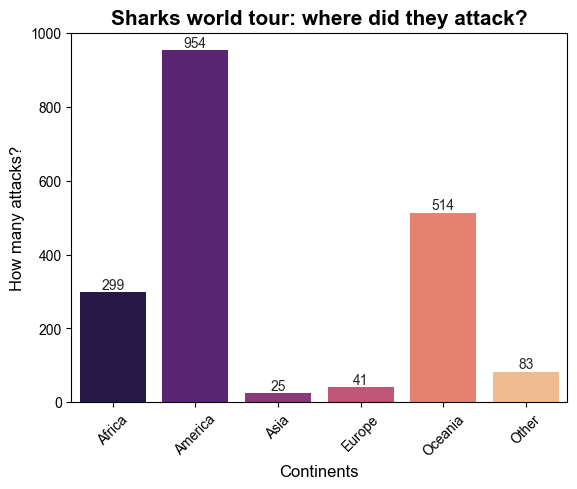

In [40]:
graph1a=sns.barplot(x=hip1["Continente"], y=hip1["n_attacks"], palette="magma", estimator=sum, ci=None)
graph1a.tick_params(axis='x', labelrotation=45)
graph1a.set_title('Sharks world tour: where did they attack?', weight="bold", size=15)
graph1a.set_xlabel('Continents', fontsize=12)
graph1a.set_ylabel('How many attacks?', fontsize=12)
sns.set_style("darkgrid")


for i in graph1a.containers:
    graph1a.bar_label(i,);

In [41]:
hip1[["Continente","Sex"]].groupby("Continente").count()


,Sex
Continente,
Africa,299
America,954
Asia,25
Europe,41
Oceania,514
Other,83


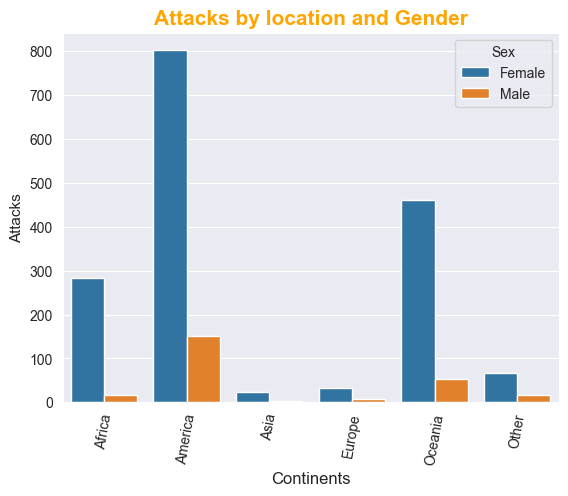

In [42]:
#check the attacks by country, split by sex
graph1b=sns.countplot(x=hip1["Continente"], hue=hip1["Sex"], palette="tab10")
graph1b.tick_params(axis='x', labelrotation=80)
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
graph1b.set_title('Attacks by location and Gender', weight="bold", size=15, color="Orange")
graph1b.set_xlabel('Continents', fontsize=12)
graph1b.set_ylabel('Attacks', fontsize=11)
sns.set_style("whitegrid");

In [43]:
hip1.to_excel("datasets/sa_hip1.xlsx")

Hipothesis 2: a los tiburones les gustan mayores...número de ataques de tiburones por edad 
¿Hay alguna relación entre ataques y sexo también dentro de los grupos de edad?


In [44]:
hip2=hip1.copy()

In [45]:
hip2.Age.unique() #values seem reasonable, so ok
hip2.Age.min()
hip2.Age.max()

84.0

In [46]:
from sources.funciones import grupedad 

In [47]:
hip2['Grupedad'] = hip2['Age'].apply(lambda x: grupedad(x))

C:\Users\Aida\AppData\Local\Temp\ipykernel_2448\781706097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph2a=sns.boxplot(x=hip2["Age"], palette="magma")


''

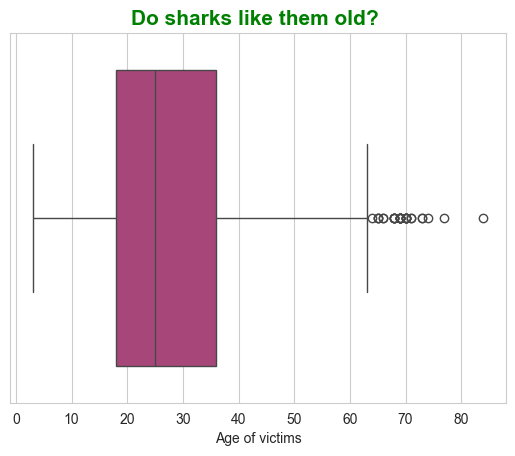

In [48]:
graph2a=sns.boxplot(x=hip2["Age"], palette="magma")
graph2a.set(xlabel="Age of victims")
plt.title("Do sharks like them old? ", weight="bold", size=15, color="Green")
sns.set_style("white")
;

In [49]:
from sources.funciones import grupedad_cat

In [50]:
hip2['Grupedad_cat'] = hip2['Age'].apply(lambda x: grupedad_cat(x))

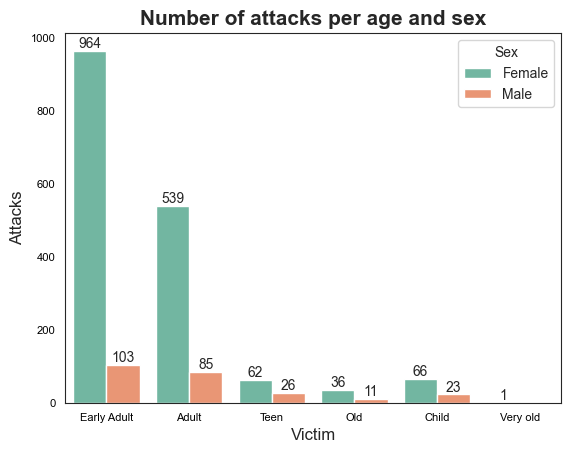

In [51]:
graph2b=sns.countplot(x=hip2["Grupedad_cat"], hue=hip2["Sex"], palette="Set2")
plt.title("Number of attacks per age and sex", weight="bold", size=15)
graph2b.tick_params(colors='black', grid_color='orange', grid_alpha=0.3)
plt.legend(title='Sex', loc='best', labels=['Female', 'Male'])
graph2b.set_xlabel('Victim', fontsize=12)
graph2b.set_ylabel('Attacks', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

for i in graph2b.containers:
    graph2b.bar_label(i,);


In [52]:

hip2['Fatal'] = hip2['Fatal'].str.replace('M', 'N')
hip2['Fatal'] = hip2['Fatal'].str.replace(' N', 'N')
hip2['Fatal'] = hip2['Fatal'].str.replace('2017', 'Y')
hip2['Fatal'] = hip2['Fatal'].replace({'UNKNOWN': np.nan})
hip2 = hip2.dropna(subset=['Fatal']) #drop the missing values of the variable Fatal


In [53]:
hip2.Fatal.unique()

array(['N', 'Y'], dtype=object)

In [54]:
hip2.Fatal.value_counts()

Fatal
N    1621
Y     294
Name: count, dtype: int64

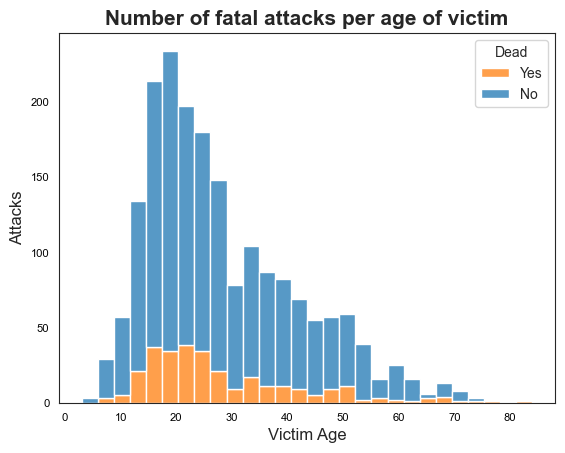

In [55]:
graph2c=sns.histplot(data=hip2, x="Age", hue="Fatal", multiple="stack", color="magma")
plt.legend(title='Dead', loc='upper right', labels=['Yes', 'No'])
sns.set_style("white")
plt.title("Number of fatal attacks per age of victim", weight="bold", size=15)
graph2c.tick_params(colors='black', grid_color='orange', grid_alpha=0.3)
graph2c.set_xlabel('Victim Age', fontsize=12)
graph2c.set_ylabel('Attacks', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);



In [56]:
hip2.to_excel("datasets/sa_hip2.xlsx")

Hipotesis 3
hay algún algún nombre que los tiburones prefieran más? es porque son unos provocones?

In [57]:
hip3=hip2.copy()


In [58]:
hip3.Species #too many and very disordered!

2860                                    Raggedtooth shark
2286                                          White shark
715                                           Tiger shark
3161                             White shark, 3 m [10'] k
3168    White shark, 3.5 m [11.5'], species identity c...
                              ...                        
442                                        Blacktip shark
3663                                     1.8 m [6'] shark
4008                                     1.2 m [4'] shark
3335                     Thought to involve a tiger shark
57                                    Tiger shark, female
Name: Species, Length: 1915, dtype: object

In [59]:
hip3['Sharks'] = attack_clean['Species'].str.extract(r'(\w+)\s+shark')
hip3.Sharks.info()

<class 'pandas.core.series.Series'>
Index: 1915 entries, 2860 to 57
Series name: Sharks
Non-Null Count  Dtype 
--------------  ----- 
1399 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [60]:
hip3.sample()
hip3["Sharks"]= hip3["Sharks"].str.title()
hip3 = hip3.dropna(subset=['Sharks'])
hip3['Sharks']=hip3['Sharks'].str.replace('Nan', 'Other')
hip3['Sharks']=hip3['Sharks'].str.replace('M', 'Mako')
hip3['Sharks']=hip3['Sharks'].str.replace('2Mako', 'Mako')
hip3['Sharks']=hip3['Sharks'].str.replace('3Mako', 'Mako')
hip3['Sharks']=hip3['Sharks'].str.replace('Makoako', 'Mako')
hip3['Sharks']=hip3['Sharks'].str.replace('Lb', 'Other')
hip3['Sharks']=hip3['Sharks'].str.replace('6', 'Other')
hip3['Sharks']=hip3['Sharks'].str.replace('Kg', 'Other')
hip3['Sharks']=hip3['Sharks'].str.replace('3', 'Other')

In [61]:
hip3.Sharks.unique()

array(['Raggedtooth', 'White', 'Tiger', 'Dusky', 'Bull', 'Copper', 'Mako',
       'Whitetip', 'Blacktip', 'Hammerhead', 'Zambesi', 'Makoetre',
       'Zambezi', 'Blue', 'Lemon', 'Other', 'Of', 'Small', 'Spinner',
       'Nurse', 'Sand', 'Reef', 'Unidentified', 'Young', 'Colored',
       'Juvenile', 'Porbeagle', 'Sevengill', 'Galapagos', 'Larger',
       'Sandbar', 'For', 'Silky', 'Bonita', 'Carcharhinid', 'Dog',
       'Sandtiger', 'Cutter', 'Thresher', 'Dogfish', 'A', 'Foot', 'Brown',
       'Angel', 'Bonnethed', 'Smoothhound', 'Wobbegong', 'Whaler', '2',
       'Another', 'Cm', 'Whale', 'Nose', 'Grey', 'Cookiecutter', 'Same',
       'Carpet', 'Gill', 'Jackson', 'Other0Other', 'Hooked'], dtype=object)

In [62]:
hip3.reset_index(drop=True)

,Year,Name,Age,Sex,Country,Species,Fatal,n_attacks,Continente,Grupedad,Grupedad_cat,Sharks
0,1985.0,Marius Botha,15.0,M,South Africa,Raggedtooth shark,N,1,Africa,0-18,Early Adult,Raggedtooth
1,1996.0,Gyula Plaganyi,29.0,M,South Africa,White shark,N,1,Africa,19-40,Early Adult,White
2,2012.0,Liya Sibili,20.0,M,South Africa,Tiger shark,Y,1,Africa,19-40,Early Adult,Tiger
3,1976.0,Geoffrey Kirkam Spence,19.0,M,South Africa,"White shark, 3 m [10'] k",N,1,Africa,19-40,Early Adult,White
4,1976.0,Marshall Flanagan,20.0,M,South Africa,"White shark, 3.5 m [11.5'], species identity c...",N,1,Africa,19-40,Early Adult,White
...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1999.0,Sylvia Lanner,41.0,F,Mauritius,"Grey reef shark, 1.5 m",N,1,Other,41-60,Adult,Reef
1395,2011.0,Adam 'Biff' D'Esposito,32.0,M,French Polynesia,Grey reef shark,N,1,Other,19-40,Adult,Reef
1396,2015.0,male,9.0,M,French Polynesia,Blacktip shark,N,1,Other,0-18,Child,Blacktip
1397,1972.0,"Alan Banner, Peace Corps volunteer",25.0,M,Western Samoa,Thought to involve a tiger shark,Y,1,Other,19-40,Early Adult,Tiger


In [63]:
hip3['Sharks'] = hip3['Sharks'].astype(str)

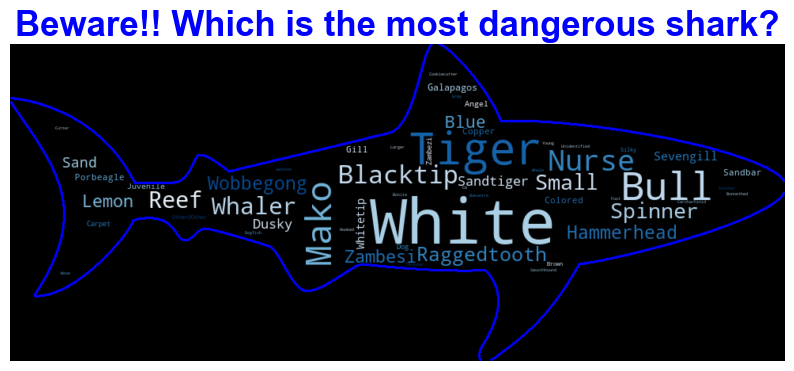

In [64]:
sharks=hip3["Sharks"]
text = " ".join(i for i in sharks)
mask = np.array(Image.open("images/shark.png"))
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=400, mask=mask, colormap="Blues", contour_width=3, contour_color="blue").generate(text)
plt.figure( figsize=(10,10))
plt.title("Beware!! Which is the most dangerous shark?", weight="bold", size=25, color="Blue")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/Shark_wc.png', bbox_inches='tight', dpi=300)
plt.show()


In [65]:
hip3.to_excel("datasets/sa_hip3.xlsx")